In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [3]:
#Задаем распределение Парето

k = 5
xm = 1
pareto = sts.pareto(scale=xm, b = k)

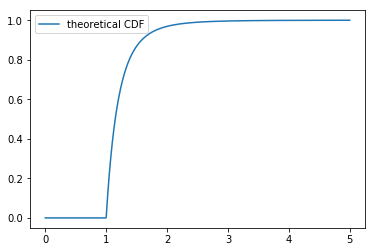

In [4]:
x = np.linspace(0,5,1000)
cdf = pareto.cdf(x)

plt.plot(x, cdf, label='theoretical CDF')
plt.legend(loc='upper left')

In [5]:
#Генерируем выборку
sample = pareto.rvs(1000)

pdf = pareto.pdf(x)

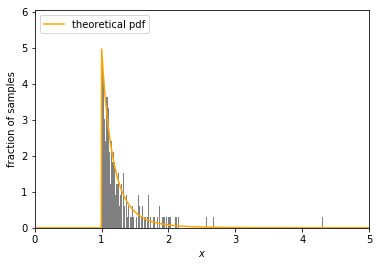

In [6]:
#Гистограмма выборки и теоретическая плотность

plt.hist(sample, bins=1000, normed=True, color='grey')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

plt.plot(x, pdf, color='orange', label='theoretical pdf')

plt.xlim(0, 5)

plt.legend(loc='upper left')

In [7]:
#задаем три значения для n
n = [5, 10, 50]

mu = np.zeros(len(n))
sigma = np.zeros(len(n))

In [8]:
#Считаем значения параметров нормального распределения

count = 0
for item in n:
    smpl = np.array([pareto.rvs(size=item) for i in range(1000)])
    mu[count] = k / (k - 1)
    sigma[count] = np.sqrt((((1. / (k - 1.))**2) * k / (k - 2.) / item))
    count += 1

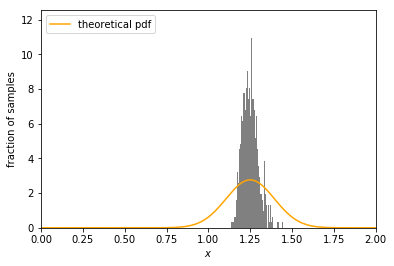

In [9]:
#Гистограмма и плотность нормального распределения для n = 5

norm = sts.norm(loc=mu[0], scale=sigma[0])
pdf_n = norm.pdf(x)

plt.hist(smpl.mean(axis=1), bins=100, normed=True, color='grey')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

plt.plot(x, pdf_n, color='orange', label='theoretical pdf')
plt.xlim(0,2)

plt.legend(loc='upper left')

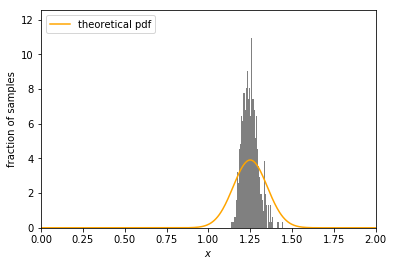

In [10]:
#Гистограмма и плотность нормального распределения для n = 10

norm = sts.norm(loc=mu[1], scale=sigma[1])
pdf_n = norm.pdf(x)

plt.hist(smpl.mean(axis=1), bins=100, normed=True, color='grey')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

plt.plot(x, pdf_n, color='orange', label='theoretical pdf')
plt.xlim(0,2)

plt.legend(loc='upper left')

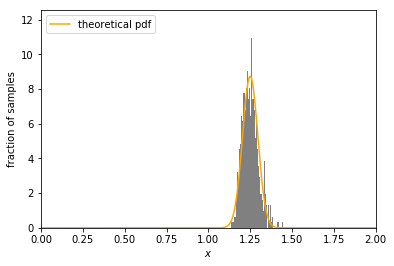

In [11]:
#Гистограмма и плотность нормального распределения для n = 50

norm = sts.norm(loc=mu[2], scale=sigma[2])
pdf_n = norm.pdf(x)

plt.hist(smpl.mean(axis=1), bins=100, normed=True, color='grey')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

plt.plot(x, pdf_n, color='orange', label='theoretical pdf')
plt.xlim(0,2)

plt.legend(loc='upper left')

# Вывод:
Из полученых графиков видно, что при увеличении обьёма выборки, которую мы используем для построения выборочного среднего, точность аппроксимации тоже увеличивается.